# Diabetes Prediction Using Machine Learning  
**Author:** Anshuman Nayak  



## Introduction

This project focuses on predicting diabetes using machine learning models.  
We use the **Pima Indians Diabetes Dataset**, which contains medical records of female patients aged 21 and above.  

### Dataset Features:
- **Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age**  
- **Target Variable:** 1 (Diabetic), 0 (Non-Diabetic)  

The dataset undergoes preprocessing, including handling missing values, normalization, and class balancing.  
Various machine learning models are trained and evaluated to identify the most effective predictor.  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

In [4]:
dataset = pd.read_csv('diabetes.csv')

In [5]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Exploratory Data Analysis (EDA)**
Before building the model, let's explore the dataset through visualizations 
to understand feature distributions and correlations.


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Correlation heatmap')

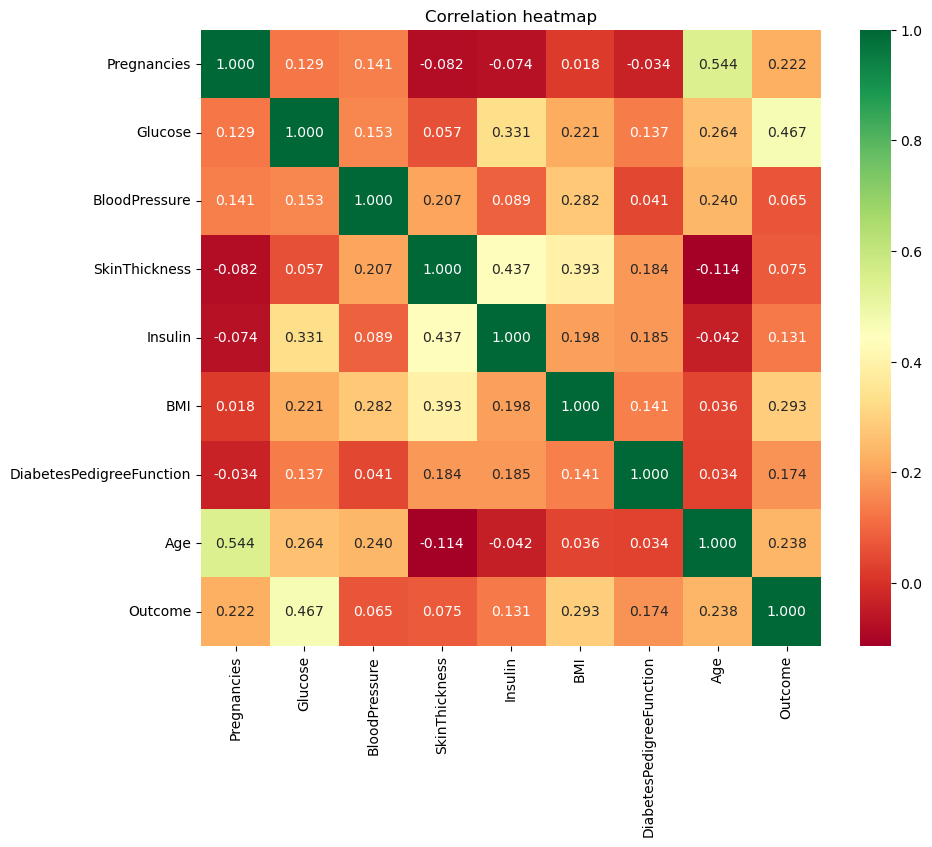

In [10]:
#correlation plot for independet vars

plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot= True, fmt= ".3f", cmap = "RdYlGn")
plt.title("Correlation heatmap")

[]

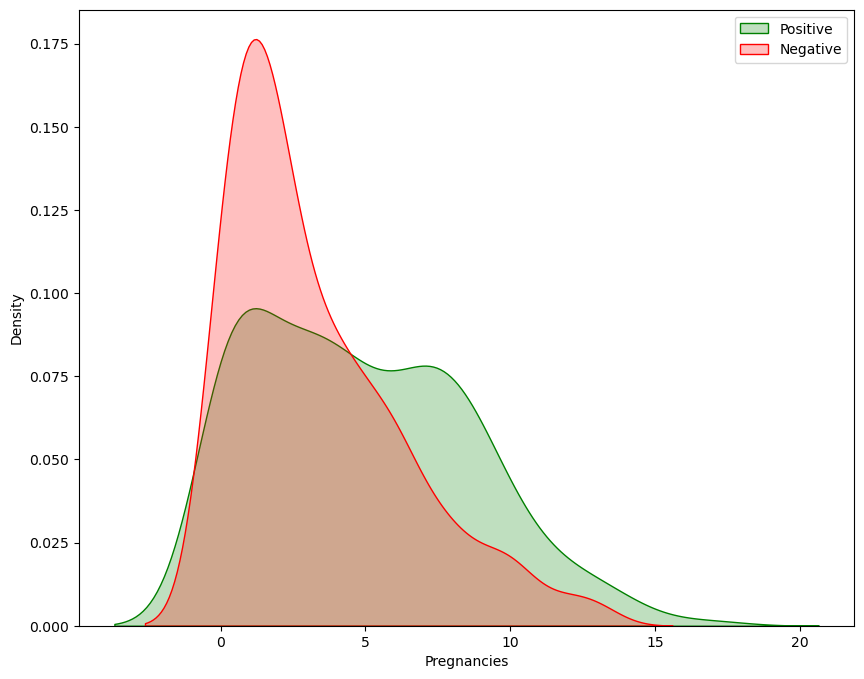

In [11]:
#exploring pregnancy and target variables
plt.figure(figsize = (10,8))

#plotting density function graph of the pregnancies and target variables
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"] == 1], color = "Green", fill = True)
kde2 = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"] == 0], color = "Red", fill = True)

kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

kde.plot()
kde2.plot()

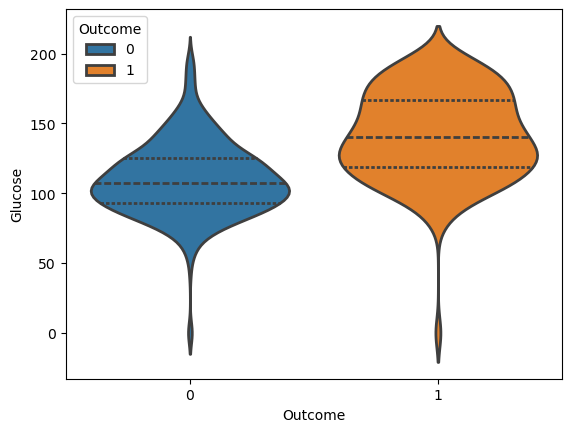

In [12]:
#exploring pregnancy and target variables
sns.violinplot(data=dataset, x="Outcome", y="Glucose", hue= "Outcome", linewidth = 2,inner="quart")
plt.show()

[]

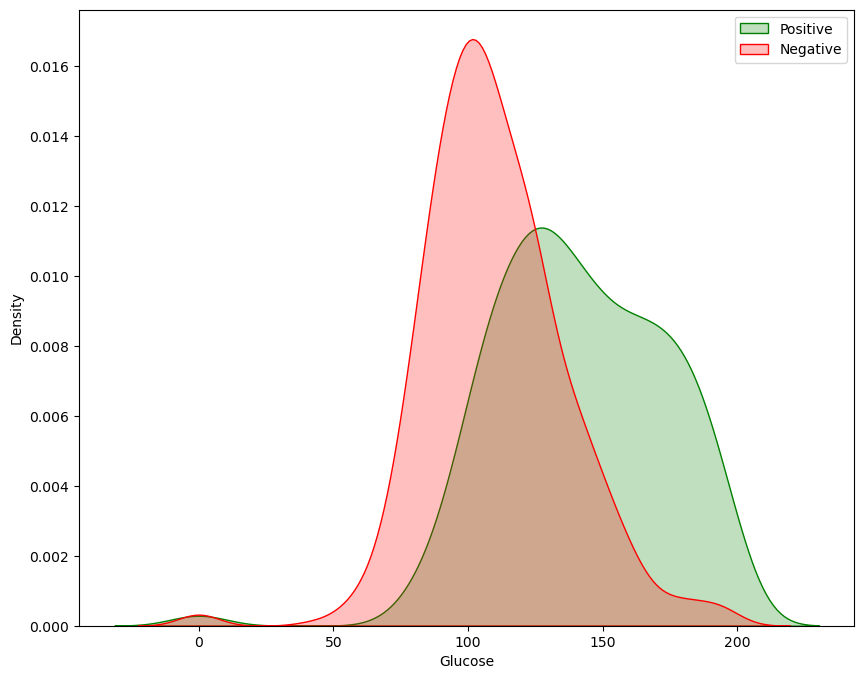

In [13]:
#exploring glucose and target variables
plt.figure(figsize = (10,8))

#plotting density function graph of the Glucose and target variables
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"] == 1], color = "Green", fill = True)
kde2 = sns.kdeplot(dataset["Glucose"][dataset["Outcome"] == 0], color = "Red", fill = True)

kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negative"])

kde.plot()
kde2.plot()

In [14]:
#replacing the 0 values with the mean/median of the feature
#Glucose
dataset["Glucose"] = dataset["Glucose"].replace(0, dataset["Glucose"].median())

#BloodPressure
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0, dataset["BloodPressure"].median())

#SkinThickness
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())

#BMI
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].mean())

#Insulin
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())

In [15]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [16]:
# splitting the dependent and indepenedent vars
X = dataset.drop(["Outcome"], axis = 1)
y = dataset["Outcome"]

In [17]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [18]:
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
#splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,20.536458,79.799479,24.0,1.022,34
223,7,142,60,33.000000,190.000000,28.8,0.687,61
393,4,116,72,12.000000,87.000000,22.1,0.463,37
766,1,126,60,20.536458,79.799479,30.1,0.349,47
570,3,78,70,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,72,20.536458,79.799479,42.4,0.205,29


In [22]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33.000000,190.000000,34.0,0.430,43
324,2,112,75,32.000000,79.799479,35.7,0.148,21
624,2,108,64,20.536458,79.799479,30.8,0.158,21
690,8,107,80,20.536458,79.799479,24.6,0.856,34
473,7,136,90,20.536458,79.799479,29.9,0.210,50
...,...,...,...,...,...,...,...,...
311,0,106,70,37.000000,148.000000,39.4,0.605,22
429,1,95,82,25.000000,180.000000,35.0,0.233,43
182,1,117,74,20.000000,23.000000,27.7,0.299,21
586,8,143,66,20.536458,79.799479,34.9,0.129,41


## Model Selection  

We evaluate multiple machine learning models to determine the best performer for diabetes prediction.  

### Models Tested:  
1️. **K-Nearest Neighbors (KNN)**  
2️. **Decision Tree Classifier**  
3️. **Multi-Layer Perceptron (MLP)**  
4️. **Random Forest Classifier**  
5️. **XGBoost Classifier**  
6️. **Logistic Regression**  
7️. **Stacked Ensemble Model**  
8️. **AdaBoost Classifier**  

### Approach:  
🔹 Train and evaluate each model.  
🔹 Compare performance using **accuracy, precision, recall, and F1-score**.  
🔹 Apply **hyperparameter tuning** and **SMOTE for class balancing**.  
🔹 Select the best model for final prediction.  


In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [25]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    #accuracy score
    training_accuracy.append(knn.score(X_train,y_train)) 
    test_accuracy.append(knn.score(X_test,y_test)) 
     

In [26]:
training_accuracy

[1.0,
 0.8385214007782101,
 0.8424124513618677,
 0.811284046692607,
 0.8054474708171206,
 0.7957198443579766,
 0.8035019455252919,
 0.7859922178988327,
 0.7879377431906615,
 0.7801556420233463,
 0.7782101167315175,
 0.7782101167315175,
 0.7762645914396887,
 0.77431906614786,
 0.7665369649805448,
 0.7529182879377432,
 0.7665369649805448,
 0.7587548638132295,
 0.7684824902723736,
 0.7645914396887159]

In [27]:
test_accuracy

[0.6771653543307087,
 0.7086614173228346,
 0.6889763779527559,
 0.7165354330708661,
 0.6732283464566929,
 0.7047244094488189,
 0.7086614173228346,
 0.7244094488188977,
 0.7244094488188977,
 0.7322834645669292,
 0.7322834645669292,
 0.7480314960629921,
 0.7283464566929134,
 0.7362204724409449,
 0.7362204724409449,
 0.7283464566929134,
 0.7283464566929134,
 0.7362204724409449,
 0.7362204724409449,
 0.7401574803149606]

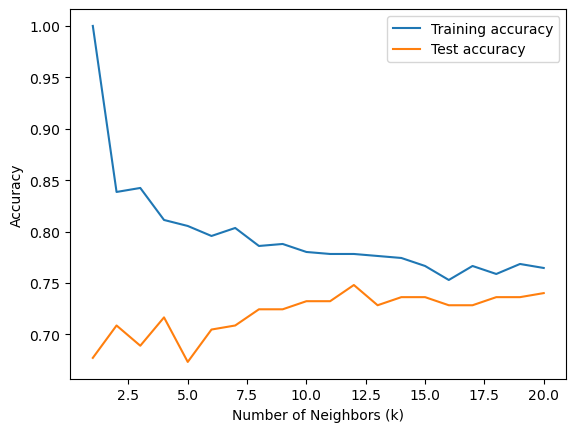

In [28]:
plt.plot(range(1,21),training_accuracy,label="Training accuracy")
plt.plot(range(1,21),test_accuracy,label="Test accuracy")
plt.xlabel("Number of Neighbors (k)")  
plt.ylabel("Accuracy")  
plt.legend()

In [29]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

#accuracy score
print("Training accuracy:", knn.score(X_train, y_train))
print("Testing accuracy:", knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training accuracy: 0.7782101167315175
Testing accuracy: 0.7480314960629921

Confusion Matrix:
 [[147  21]
 [ 43  43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       168
           1       0.67      0.50      0.57        86

    accuracy                           0.75       254
   macro avg       0.72      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254



In [30]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(random_state=0, max_depth=7,min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train,y_train)

print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.8618677042801557
0.7283464566929134


In [32]:
# MLP
from sklearn.neural_network import MLPClassifier

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=1800, random_state=42, alpha=0.01, learning_rate_init=0.0005)

mlp.fit(X_train,y_train)

print("training accuracy: ",mlp.score(X_train,y_train))
print("testing accuracy: ",mlp.score(X_test,y_test))

y_pred = mlp.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

training accuracy:  0.7645914396887159
testing accuracy:  0.7283464566929134

Confusion Matrix:
 [[141  27]
 [ 42  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       168
           1       0.62      0.51      0.56        86

    accuracy                           0.73       254
   macro avg       0.70      0.68      0.68       254
weighted avg       0.72      0.73      0.72       254



In [34]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [37]:
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy:  1.0
Testing Accuracy:  0.7480314960629921

Confusion Matrix:
 [[137  31]
 [ 33  53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.63      0.62      0.62        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



In [38]:
# XGBoost
import xgboost as xgb

In [39]:
xg = xgb.XGBClassifier(random_state = 42)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [41]:
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy:  1.0
Testing Accuracy:  0.7440944881889764

Confusion Matrix:
 [[133  35]
 [ 30  56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       168
           1       0.62      0.65      0.63        86

    accuracy                           0.74       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.74      0.75       254



In [42]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

In [43]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [44]:
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy:  0.7723735408560312
Testing Accuracy:  0.7440944881889764

Confusion Matrix:
 [[141  27]
 [ 38  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       168
           1       0.64      0.56      0.60        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.74      0.74      0.74       254



### **Handling Class Imbalance using SMOTE**
Since our dataset is imbalanced (more non-diabetic cases than diabetic ones), 
we use **Synthetic Minority Over-sampling Technique (SMOTE)** to balance the dataset 
and improve model performance.


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

log_reg = LogisticRegression(solver='liblinear', random_state=42)

log_reg.fit(X_train_resampled, y_train_resampled)

# predictions on the original test set
y_train_pred = log_reg.predict(X_train_resampled)
y_test_pred = log_reg.predict(X_test)

In [47]:
print("Training Accuracy: ", accuracy_score(y_train_resampled, y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy:  0.7786144578313253
Testing Accuracy:  0.7047244094488189

Confusion Matrix:
 [[121  47]
 [ 28  58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       168
           1       0.55      0.67      0.61        86

    accuracy                           0.70       254
   macro avg       0.68      0.70      0.69       254
weighted avg       0.72      0.70      0.71       254



In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# base models
base_learners = [
    ('log_reg', LogisticRegression(solver='liblinear', random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

meta_model = LogisticRegression(solver='liblinear', random_state=42)

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

In [49]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

In [50]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Training Accuracy: 0.8171206225680934
Testing Accuracy: 0.7519685039370079

Confusion Matrix:
 [[143  25]
 [ 38  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       168
           1       0.66      0.56      0.60        86

    accuracy                           0.75       254
   macro avg       0.72      0.70      0.71       254
weighted avg       0.75      0.75      0.75       254



In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

ada_boost.fit(X_train, y_train)

# Make predictions
y_train_pred = ada_boost.predict(X_train)
y_test_pred = ada_boost.predict(X_test)

print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy:  0.8171206225680934
Testing Accuracy:  0.7598425196850394

Confusion Matrix:
 [[138  30]
 [ 31  55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.65      0.64      0.64        86

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



## Model Comparison 
We have trained multiple models, now we will compare their performance based on accuracy, precision, recall, and F1-score.  
A **summary table** and visual representation will help in selecting the best-performing model.

In [53]:
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "MLP": mlp,
    "Random Forest": rf,
    "XGBoost": xg,
    "Logistic Regression": log_reg,
    "Stacking Classifier": stacking_clf,  
    "AdaBoost": ada_boost
}

model_results = {}

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_results[name] = [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred)
    ]

# Converting results to DataFrame
model_df = pd.DataFrame.from_dict(
    model_results, 
    orient="index", 
    columns=["Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1-score"]
)

In [54]:
model_df

,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
KNN,0.778210,0.748031,0.671875,0.500000,0.573333
Decision Tree,0.861868,0.728346,0.607595,0.558140,0.581818
MLP,0.764591,0.728346,0.619718,0.511628,0.560510
Random Forest,1.000000,0.748031,0.630952,0.616279,0.623529
XGBoost,1.000000,0.744094,0.615385,0.651163,0.632768
Logistic Regression,0.784047,0.704724,0.552381,0.674419,0.607330
Stacking Classifier,0.817121,0.751969,0.657534,0.558140,0.603774
AdaBoost,0.817121,0.759843,0.647059,0.639535,0.643275


<Figure size 1200x600 with 0 Axes>

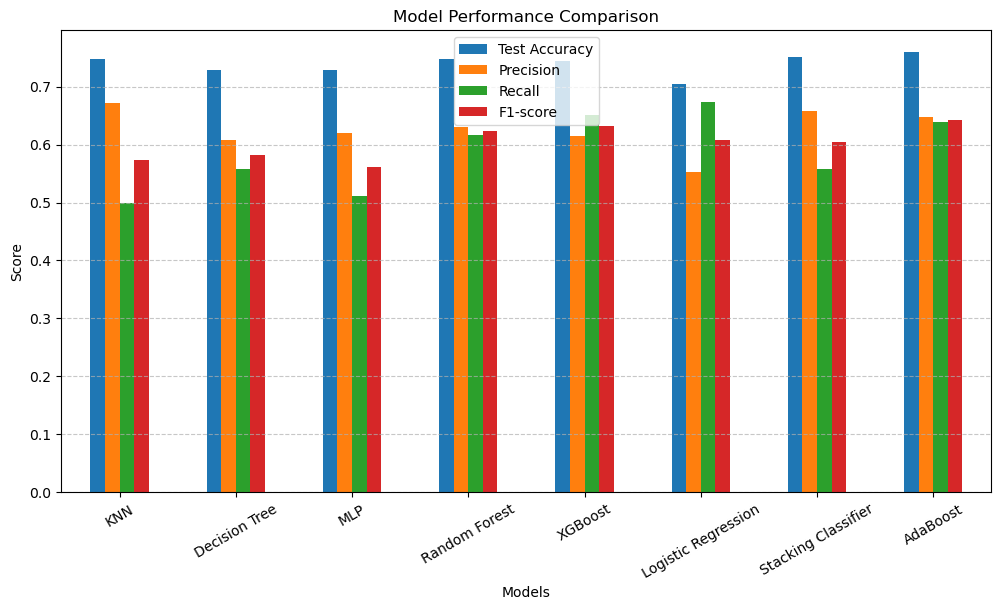

In [55]:
plt.figure(figsize=(12, 6))
model_df[["Test Accuracy", "Precision", "Recall", "F1-score"]].plot(kind='bar', figsize=(12,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=30)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


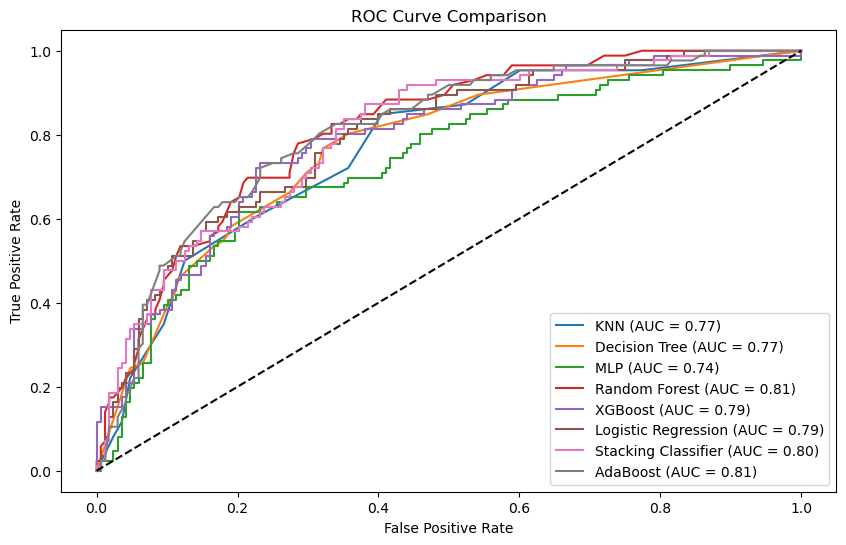

In [56]:
#ROC Curve
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## **Final Model Selection**
### **Key Observations:**  
- **AdaBoost Classifier** achieved the highest **test accuracy (75.98%)** and a balanced performance across metrics.  
- **Stacking Classifier** performed well but had a slightly lower recall compared to AdaBoost.  
- **XGBoost & Random Forest** had high training accuracy but suffered from potential overfitting.  
- **Logistic Regression & KNN** had lower recall, making them less suitable for imbalanced data.  


⭐ After evaluating multiple models based on accuracy, precision, recall, and F1-score, we selected **AdaBoost** as the best-performing model.  

#### **Reason to select AdaBoost:**
- **Highest Test Accuracy** (**75.98%**), meaning better generalization.
- **Balanced Precision (0.647), Recall (0.640), and F1-score (0.643)**.
- **Less overfitting** compared to models like Random Forest and XGBoost.
- **Better recall than Logistic Regression**, making it more reliable for predictions.

Thus, **AdaBoost** is the final model chosen for the Diabetes Prediction task.


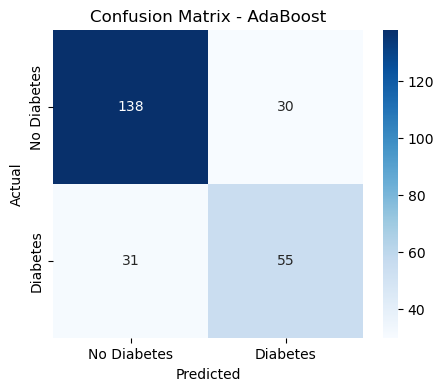

In [58]:
# confusion matrix for AdaBoost
cm = confusion_matrix(y_test, ada_boost.predict(X_test))

# heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


## Conclusion  

In this project, we explored multiple machine learning models to predict diabetes based on given patient data. After systematically evaluating various classifiers, **AdaBoost** emerged as the best-performing model, achieving a **testing accuracy of 75.98%** with a balanced precision and recall.  

While the model demonstrates decent predictive performance, there is still room for improvement. Future enhancements could include:  
- **Advanced feature engineering** to extract more meaningful patterns.  
- **Further hyperparameter tuning** to optimize model performance.  
- **Exploring alternative ensemble methods** or deep learning techniques for potential improvements.  

This project successfully demonstrates the application of machine learning in diabetes prediction. The **AdaBoost model** is now finalized and ready for use in making predictions based on new patient data.  
